In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
h5f=h5py.File('/content/drive/MyDrive/Image Processing/SVHN_single_grey1.h5','r')
X_train=h5f['X_train'][:]
Y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
Y_test=h5f['y_test'][:]
h5f.close()

In [18]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((42000, 32, 32), (42000,), (18000, 32, 32), (18000,))

In [8]:
X_train[0:2]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

In [9]:
Y_train[0:2]

array([2, 6], dtype=uint8)

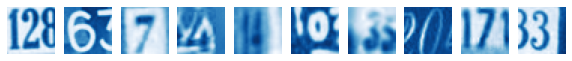

Tags attached to above images are :  [2 6 7 4 4 0 3 0 7 3]


In [3]:
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap='Blues')
  plt.axis('off')
plt.show()
print("Tags attached to above images are : ",Y_train[0:10])

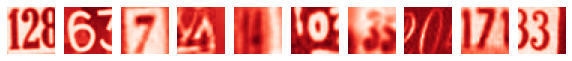

Tags attached to above images are :  [2 6 7 4 4 0 3 0 7 3]


In [14]:
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap='Reds')
  plt.axis('off')
plt.show()
print("Tags attached to above images are : ",Y_train[0:10])

### **Neural Network**

1st layer = 32 x 32, hidden = 400, relu
    
    dropout
    Batch_Normalization

2nd layer = 400, relu
    
    dropout
    Batch_Normalization

3rd layer = 200, relu
    
    dropout
    Batch_Normalization

4th layer = 100, relu
    
    dropout
    Batch_Normalization

5th layer = 25, relu
    
    dropout
    Batch_Normalization
    
6th layer = 10, softmax

In [4]:
from keras.layers import BatchNormalization,Dropout,Dense,Activation
from keras.models import Sequential
from keras import optimizers
from keras.utils.np_utils import to_categorical

In [29]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)

In [30]:
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [31]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((42000, 1024), (42000, 10), (18000, 1024), (18000, 10))

In [23]:
def mlp_model():
  model=Sequential()
  model.add(Dense(400,input_shape=(1024,),kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(400,kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(200,kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(Dense(100,kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(Dense(25,kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dropout(0.05))
  model.add(BatchNormalization())
  model.add(Dense(10,kernel_initializer='he_normal'))
  model.add(Activation('softmax'))
  sgd=optimizers.SGD(lr=0.01)
  model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [33]:
model=mlp_model()
history=model.fit(X_train,Y_train,epochs=100,verbose=1)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1313/1313 [==============================] - 18s 12ms/step - loss: 2.4844 - accuracy: 0.1132
Epoch 2/100
1313/1313 [==============================] - 27s 21ms/step - loss: 2.2539 - accuracy: 0.1568
Epoch 3/100
1313/1313 [==============================] - 18s 14ms/step - loss: 2.1462 - accuracy: 0.2049
Epoch 4/100
1313/1313 [==============================] - 16s 12ms/step - loss: 2.0549 - accuracy: 0.2439
Epoch 5/100
1313/1313 [==============================] - 16s 12ms/step - loss: 1.9640 - accuracy: 0.2789
Epoch 6/100
1313/1313 [==============================] - 16s 12ms/step - loss: 1.8950 - accuracy: 0.3147
Epoch 7/100
1313/1313 [==============================] - 16s 12ms/step - loss: 1.8506 - accuracy: 0.3347
Epoch 8/100
1313/1313 [==============================] - 17s 13ms/step - loss: 1.7923 - accuracy: 0.3599
Epoch 9/100
1313/1313 [==============================] - 16s 12ms/step - loss: 1.7512 - accuracy: 0.3768
Epoch 10/100
1313/1313 [==============================]

In [34]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 400)               410000    
                                                                 
 activation_30 (Activation)  (None, 400)               0         
                                                                 
 dropout_25 (Dropout)        (None, 400)               0         
                                                                 
 batch_normalization_25 (Bat  (None, 400)              1600      
 chNormalization)                                                
                                                                 
 dense_37 (Dense)            (None, 400)               160400    
                                                                 
 activation_31 (Activation)  (None, 400)               0         
                                                     

In [35]:
results=model.evaluate(X_test,Y_test)
print("Accuracy : ",results[1])

563/563 [==============================] - 3s 5ms/step - loss: 1.3903 - accuracy: 0.6947
Accuracy :  0.6947222352027893
